In [1]:
import os

from logical_fusions import AdaptiveFusionDecoder, AnalyticShor22, TransversalFusionDecoder, AdaptiveFailureBasisFusionDecoder, prob_from_dict, get_fusion_peformance, rgs_success_probability

import networkx as nx
from graphs import draw_graph, gen_ring_graph, graph_from_edges
import matplotlib.pyplot as plt
from helpers import load_obj, save_obj
from os import getcwd
import numpy as np
from logical_fusions import fusion_threshold_from_dict
from scipy.interpolate import interp1d




In [2]:
def best_graphs_func(n=None, shor=False):
    """
    These are the best 6-9 qubit graphs found by Lowe for transversal fusion, optimised at pfail = 0.25
    :param n:
    :return:
    """
    g = nx.Graph()
    if shor:
        g.add_nodes_from(list(range(5)))
        g.add_edges_from([(0, 1), (1, 2), (0, 3), (3, 4)])
    else:
        g.add_nodes_from(list(range(n)))
        if n == 6:
            g.add_edges_from([(0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (2, 5)])
        elif n == 7:
            g.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 6), (1, 4), (1, 5), (2, 4), (3, 4), (3, 5)])
        elif n == 8:
            g.add_edges_from([(0, 1), (0, 2), (0, 4), (0, 6), (0, 7), (1, 3), (1, 4), (1, 5), (2, 3), (2, 5), (3, 5), (3, 7), (4, 5), (4, 7), (5, 6), (6, 7)])
        elif n == 9:
            g.add_edges_from([(0, 2), (0, 3), (0, 4), (0, 7), (0, 8), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6), (3, 7), (3, 8),
            (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 8), (6, 8), (7, 8)])
    return g


Lets look at the 6 ring encoded shor code discussed in the FBQC paper, and numerically simulate it to test decoder performance.
It is locally equivalent to a line graph.

Notably, in the FBQC they have a randomized Shor encoding, so the probability of doing X and Z logical measurements is randomized (take the average, not the minimum)

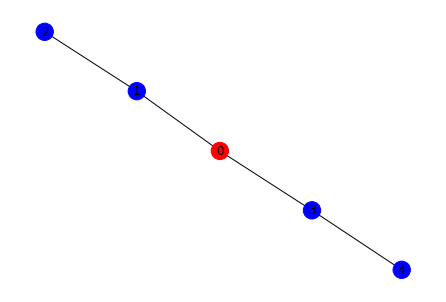

[{'x': False, 'z': True, 'probs': ({1, 2}, {3, 4}, set(), set(), set())}, {'x': False, 'z': True, 'probs': ({1, 2}, {3}, set(), {4}, set())}, {'x': False, 'z': True, 'probs': ({1, 2}, {3}, set(), set(), {4})}, {'x': False, 'z': True, 'probs': ({1, 2}, {4}, {3}, set(), set())}, {'x': False, 'z': True, 'probs': ({1, 2}, set(), {3}, set(), {4})}, {'x': False, 'z': True, 'probs': ({1, 2}, {4}, set(), {3}, set())}, {'x': False, 'z': True, 'probs': ({1, 2}, set(), set(), {3, 4}, set())}, {'x': True, 'z': False, 'probs': ({1, 3}, {2, 4}, set(), set(), set())}, {'x': True, 'z': False, 'probs': ({1, 3}, {2}, {4}, set(), set())}, {'x': True, 'z': False, 'probs': ({1, 4}, {2, 3}, set(), set(), set())}, {'x': True, 'z': True, 'probs': ({1}, {2, 3, 4}, set(), set(), set())}, {'x': True, 'z': False, 'probs': ({1}, {2, 3}, {4}, set(), set())}, {'x': True, 'z': True, 'probs': ({1}, {2, 3}, set(), {4}, set())}, {'x': True, 'z': True, 'probs': ({1}, {2, 3}, set(), set(), {4})}, {'x': True, 'z': True, 'p

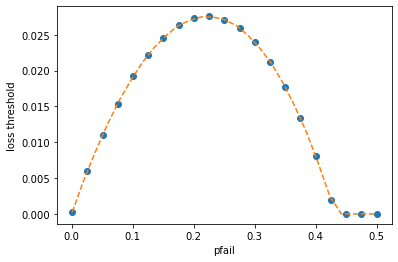

In [3]:
g = best_graphs_func(shor=True)
draw_graph(g)
dec_transversal = TransversalFusionDecoder(g)
dec_transversal.decode()
print(dec_transversal.fusion_outcomes)
dec_transversal.plot_threshold(show=False, n_points=21, optimising_eta=0.98, w=0.5, line='o', take_min=False)

shor_dec = AnalyticShor22()
shor_dec.plot_threshold(show=True, w=0.5)


There is nice agreement between the numerical and analytic results. Note that the Shor encoding is not optimal with w=0.5.
If we allow this parameter to vary we can do better.



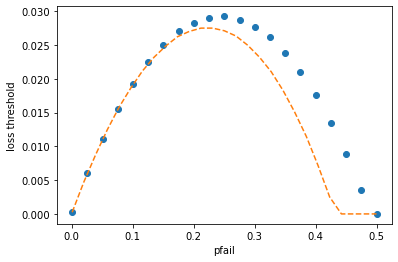

In [4]:
dec_transversal.plot_threshold(show=False, n_points=21, optimising_eta=0.98, line='o', take_min=False)
shor_dec.plot_threshold(show=True, w=0.5)


Now lets inspect the performance of the best 6-9 qubit graphs with transversal fusions



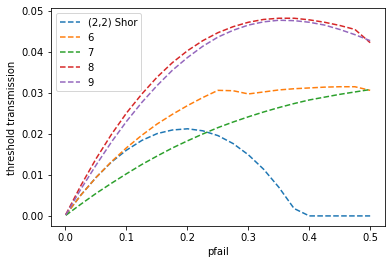

In [5]:
gs = [best_graphs_func(shor=True)]
for nq in [6, 7, 8, 9]:
    gs.append(best_graphs_func(nq))
for g in gs:
    transversal_decoder = TransversalFusionDecoder(g)
    transversal_decoder.decode()
    transversal_decoder.plot_threshold(n_points=21, optimising_eta=0.975, show=False)
plt.legend(['(2,2) Shor', 6, 7, 8, 9])
plt.xlabel('pfail')
plt.ylabel('threshold transmission')
plt.show()



Now lets inspect the same graphs with the Adaptive decoder




KeyboardInterrupt: 

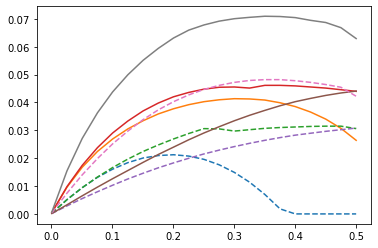

In [5]:
gs = [best_graphs_func(shor=True)]
for nq in [6, 7, 8, 9]:
    gs.append(best_graphs_func(nq))
for g in gs:
    transversal_decoder = TransversalFusionDecoder(g)
    transversal_decoder.decode()
    transversal_decoder.plot_threshold(n_points=21, optimising_eta=0.975, show=False)
    adaptive_decoder = AdaptiveFusionDecoder(g)
    adaptive_decoder.build_tree()
    adaptive_decoder.plot_threshold(n_points=21, optimising_eta=0.95, show=False, line='-')
plt.legend(['(2,2) Shor', '(2,2) Shor', 6, 6, 7, 7, 8, 8, 9, 9])
plt.xlabel('pfail')
plt.ylabel('threshold transmission')
plt.show()

In [ ]:
gs = [best_graphs_func(shor=True), gen_ring_graph(5) ]
for nq in [6, 7, 8, 9]:
    gs.append(best_graphs_func(nq))
for g in gs:
    print(g.number_of_nodes())
    adaptive_decoder = AdaptiveFusionDecoder(g)
    adaptive_decoder.build_tree()
    adaptive_decoder.plot_threshold(n_points=21, optimising_eta=0.95, show=False, line='-')
plt.legend(['(2,2) Shor', 5, 6, 7, 8, 9])
plt.xlabel('pfail')
plt.ylabel('threshold transmission')
plt.show()

In [ ]:
g = gen_ring_graph(5)
dec = AdaptiveFusionDecoder(g)
dec.build_tree(printing=True)


## Test the performance of the cube graph


In [ ]:
cube_edges = [(0, 1), (0, 3), (0, 7), (1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 5), (4, 7), (5, 6), (6, 7)]

edges = cube_edges
graph = nx.Graph()
graph.add_nodes_from(list(range(max([a for b in edges for a in b]))))
graph.add_edges_from(edges)

g = graph
draw_graph(g)
dec_transversal = TransversalFusionDecoder(g)
dec_transversal.decode()
# print(dec_transversal.fusion_outcomes)
dec_transversal.plot_threshold(show=False, n_points=21, optimising_eta=0.97, line='o', take_min=False)

shor_dec = AnalyticShor22()
shor_dec.plot_threshold(show=True, w=0.5)

## Import the best spf and Pauli graphs for 2-11 qubits, and look at Fusion success probabilities



In [32]:
bests_spc = load_obj('best_spf_graphs_5-11_qubits', path=getcwd()+'/best_graphs')
bests_pauli = load_obj('best_pauli_graphs_5-11_qubits', path=getcwd()+'/best_graphs')
print(bests_pauli)


{5: ((EdgeView([(0, 1), (0, 2), (1, 3), (2, 4), (3, 4)]), {(0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0): 1, (0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0): 1, (0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0): 1}, {(1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 1, (1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0): 1, (1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0): 1}, {(1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 1, (2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0): 1, (1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0): 1}), 0.99960399, (EdgeView([(0, 1), (0, 2), (1, 3), (2, 4), (3, 4)]), {(0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0): 1, (0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0): 1, (0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0): 1}, {(1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 1, (1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0): 1, (1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0): 1}, {(1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 1, (2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0): 1, (1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0): 1}), 0.6177832031249999, (EdgeView([(0, 1), (0, 2), (1, 3), (2, 4), (3, 4)]), {(0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0): 1, (0, 0, 0, 

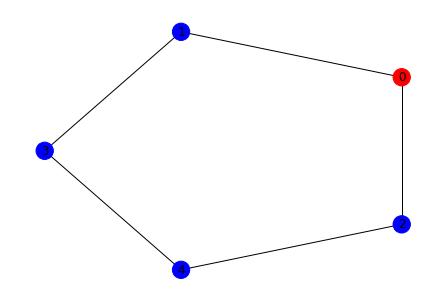

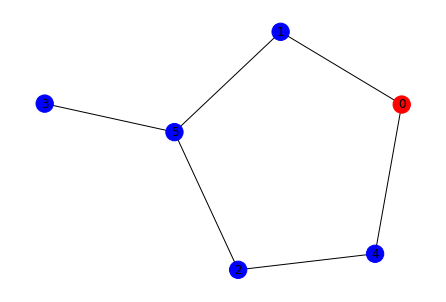

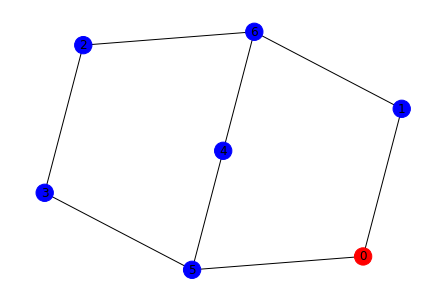

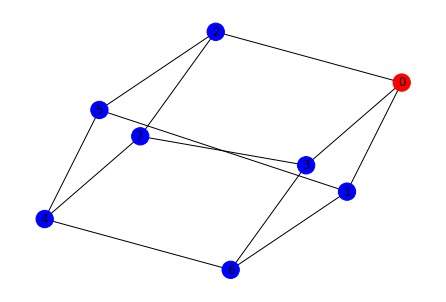

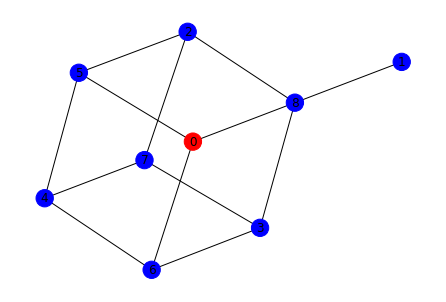

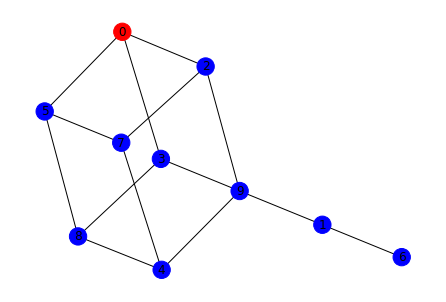

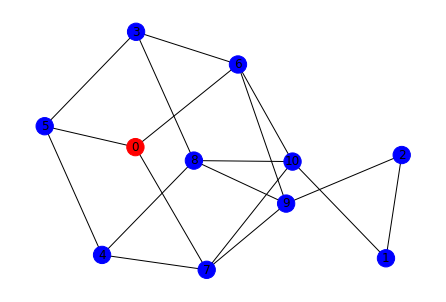

In [66]:
for k, v in bests_pauli.items():
    draw_graph(v[0][0], from_edges=True)

### Use the new pre-optimised transversal decoder to attempt logical fusions. What is the success probability?

### Save the performance dictionaries so they can be more easily loaded

Initializing nq=5
Decoding nq=5
Getting dicts nq=5
Getting best prob nq=5
nq=5 Done
Initializing nq=5
Decoding nq=5
Getting dicts nq=5
Getting best prob nq=5
nq=5 Done
Initializing nq=6
Decoding nq=6
Getting dicts nq=6
Getting best prob nq=6
nq=6 Done
Initializing nq=6
Decoding nq=6
Getting dicts nq=6
Getting best prob nq=6
nq=6 Done
Initializing nq=7
Decoding nq=7
Getting dicts nq=7
Getting best prob nq=7
nq=7 Done
Initializing nq=7
Decoding nq=7
Getting dicts nq=7
Getting best prob nq=7
nq=7 Done
Initializing nq=8
Decoding nq=8
Getting dicts nq=8
Getting best prob nq=8
nq=8 Done
Initializing nq=8
Decoding nq=8
Getting dicts nq=8
Getting best prob nq=8
nq=8 Done
Initializing nq=9
Decoding nq=9
Getting dicts nq=9
Getting best prob nq=9
nq=9 Done
Initializing nq=9
Decoding nq=9
Getting dicts nq=9
Getting best prob nq=9
nq=9 Done
Initializing nq=10
Decoding nq=10
Getting dicts nq=10
Getting best prob nq=10
nq=10 Done
Initializing nq=10
Decoding nq=10
Getting dicts nq=10
Getting best prob

KeyboardInterrupt: 

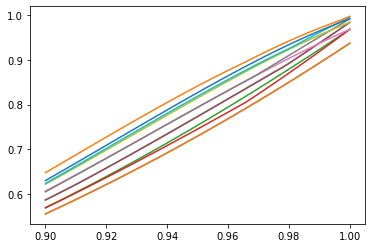

In [16]:
perf_dicts = {}
etas = np.linspace(0.9, 1)
legend = []
for nq in range(5, 12):
    perf_dicts[nq] = {}
    for graph_dict in (bests_pauli, bests_spc):
        edges = graph_dict[nq][0][0]
        g = nx.Graph()
        g.add_nodes_from(list(range(nq)))
        g.add_edges_from(edges)
        print(f'Initializing {nq=}')
        dec = TransversalFusionDecoder(g)
        print(f'Decoding {nq=}')
        dec.decode()
        print(f'Getting dicts {nq=}')
        dec.get_fixed_basis_dicts()
        if graph_dict == bests_pauli:
            perf_dicts[nq]['pauli'] = dec.fb_dicts
        elif graph_dict == bests_spc:
            perf_dicts[nq]['spc'] = dec.fb_dicts
        print(f'Getting best prob {nq=}')
        plt.plot(etas, [dec.best_fixed_basis(t, 0.5)[1] for t in etas])
        print(f'{nq=} Done')
        legend.append(f'{nq=}, {graph_dict}')
        save_obj(perf_dicts, 'TransversalFusion_perf_dicts_5-11_latest', getcwd()+'/data')
plt.xlabel(r'$\eta$')
plt.ylabel('Fusion probability')
plt.show()


nq=5 Done
nq=5 Done
nq=6 Done
nq=6 Done
nq=7 Done
nq=7 Done
nq=8 Done
nq=8 Done
nq=9 Done
nq=9 Done
nq=10 Done
nq=10 Done


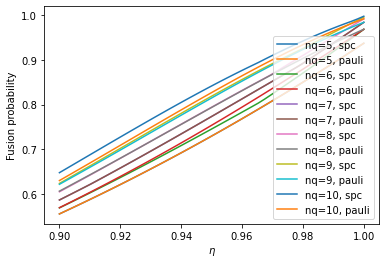

In [7]:
perf_dicts = load_obj('TransversalFusion_perf_dicts_5-11_latest', getcwd()+'/data')
data_tf = {nq:{} for nq in range(5, 11)}
etas = np.linspace(0.9, 1)
legend = []
g = gen_ring_graph(4)
for nq in range(5, 11):
    for g_type in ('spc', 'pauli'):
        dec = TransversalFusionDecoder(g)
        dec.fb_dicts = perf_dicts[nq][g_type]
        dat = [dec.best_fixed_basis(t, 0.5)[1] for t in etas]
        data_tf[nq][g_type] = dat
        plt.plot(etas, dat)
        print(f'{nq=} Done')
        legend.append(f'{nq=}, {g_type}')

plt.xlabel(r'$\eta$')
plt.ylabel('Fusion probability')
plt.legend(legend)
plt.show()


## Test the best spc and Pauli graphs in the adaptive fusion decoder
The following code block generates the data

Initializing nq=5
Decoding nq=5
Getting dicts nq=5
Getting best prob nq=5
nq=5 Done
Initializing nq=5
Decoding nq=5
Getting dicts nq=5
Getting best prob nq=5
nq=5 Done
Initializing nq=6
Decoding nq=6
Getting dicts nq=6
Getting best prob nq=6
nq=6 Done
Initializing nq=6
Decoding nq=6
Getting dicts nq=6
Getting best prob nq=6
nq=6 Done
Initializing nq=7
Decoding nq=7
Getting dicts nq=7
Getting best prob nq=7
nq=7 Done
Initializing nq=7
Decoding nq=7
Getting dicts nq=7
Getting best prob nq=7
nq=7 Done
Initializing nq=8
Decoding nq=8
Getting dicts nq=8
Getting best prob nq=8
nq=8 Done
Initializing nq=8
Decoding nq=8
Getting dicts nq=8
Getting best prob nq=8
nq=8 Done
Initializing nq=9
Decoding nq=9
Getting dicts nq=9
Getting best prob nq=9
nq=9 Done
Initializing nq=9
Decoding nq=9
Getting dicts nq=9
Getting best prob nq=9
nq=9 Done
Initializing nq=10
Decoding nq=10
Getting dicts nq=10
Getting best prob nq=10
nq=10 Done
Initializing nq=10
Decoding nq=10
Getting dicts nq=10
Getting best prob

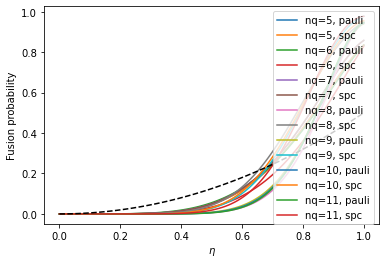

In [17]:
max_nq = 11
perf_dicts_adapt = {}
etas = np.linspace(0, 1, 100)
legend = []
data = {nq: {} for nq in range(5, max_nq + 1)}
for nq in range(5, max_nq + 1):
    perf_dicts_adapt[nq] = {}
    for graph_dict in (bests_pauli, bests_spc):
        edges = graph_dict[nq][0][0]
        g = nx.Graph()
        g.add_nodes_from(list(range(nq)))
        g.add_edges_from(edges)
        print(f'Initializing {nq=}')
        dec = AdaptiveFusionDecoder(g)
        print(f'Decoding {nq=}')
        dec.build_tree()
        print(f'Getting dicts {nq=}')
        dec.compile_results_dict()
        if graph_dict == bests_pauli:
            perf_dicts_adapt[nq]['pauli'] = dec.results_dicts
            g_type = 'pauli'
        elif graph_dict == bests_spc:
            g_type = 'spc'
            perf_dicts_adapt[nq]['spc'] = dec.results_dicts
        print(f'Getting prob {nq=}')
        data[nq][g_type] = [dec.get_probs_from_outcomes(t, 0.5, w=0.5)['fusion'] for t in etas]
        plt.plot(etas, data[nq][g_type])
        print(f'{nq=} Done')
        legend.append(f'{nq=}, {g_type}')
        save_obj(perf_dicts_adapt, 'AdaptiveFusion_perf_dicts_5-11_latest', getcwd()+'/data')
plt.legend(legend)
plt.xlabel(r'$\eta$')
plt.ylabel('Fusion probability')
plt.plot(etas, 0.5 * etas ** 2, 'k--')
plt.show()

Load data from file

In [8]:
data = load_obj('AdaptiveFusion_perf_dicts_5-11_latest', getcwd()+'/data')
print(data[nq]['spc'])


{'fusion': {((1,), (), (), ()): [{'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 4, 'zf': 0, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 1, 'xf': 0, 'y': 0, 'yf': 0, 'z': 4, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 2, 'xf': 0, 'y': 0, 'yf': 0, 'z': 3, 'zf': 2, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 2, 'xf': 1, 'y': 0, 'yf': 0, 'z': 3, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 1, 'xf': 2, 'y': 0, 'yf': 0, 'z': 4, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 1, 'xf': 0, 'y': 0, 'yf': 0, 'z': 4, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 1, 'xf': 1, 'y': 0, 'yf': 0, 'z': 4, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 2, 'xf': 0, 'y': 0, 'yf': 0, 'z': 3, 'zf': 2, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 2, 'xf': 1, 'y': 0, 'yf': 0, 'z': 3, 'zf': 2, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, {'x': 2, 'xf': 1, 'y': 0, 'yf': 0, 'z': 3, 'zf': 2, 'fusion': 1, 'ffx': 0, 'ffz': 0, 

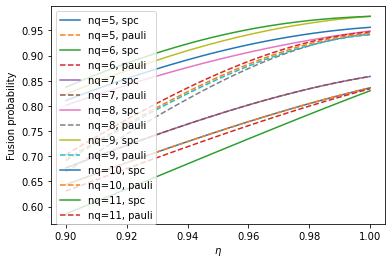

In [9]:
etas = np.linspace(0.9, 1)
legend = []
for nq in range(5, 12):
    dec = AdaptiveFusionDecoder(gen_ring_graph(3))
    dec.results_dicts = data[nq]['spc']
    probs = [dec.get_probs_from_outcomes(t, 0.5, 0.5)['fusion'] for t in etas]
    plt.plot(etas, probs, '-')
    dec.results_dicts = data[nq]['pauli']
    probs = [dec.get_probs_from_outcomes(t, 0.5, 0.5)['fusion'] for t in etas]
    plt.plot(etas, probs, '--')
    legend.append(f'{nq=}, spc')
    legend.append(f'{nq=}, pauli')
plt.legend(legend, loc='upper left')
plt.xlabel(r'$\eta$')
plt.ylabel('Fusion probability')
plt.show()

### For the AdaptiveFusionDecoder compare the performance of different w to see which performs better
### If the failure basis is deterministic there are fewer branches in the decision tree.


In [ ]:
g = gen_ring_graph(5)
dec_choose = AdaptiveFailureBasisFusionDecoder(g)
dec_choose.build_tree(printing=True)
dec = AdaptiveFusionDecoder(g)
dec.build_tree(printing=True)


### Test the adaptive decoder where you choose the failure basis



# Getting data for paper - Logical fusions
## Load all subthreshold and threshold performing graphs for 5-11 qubits


In [11]:
import os

from logical_fusions import AdaptiveFusionDecoder, AnalyticShor22, TransversalFusionDecoder, AdaptiveFailureBasisFusionDecoder
import networkx as nx
from graphs import draw_graph, gen_ring_graph, graph_from_edges
import matplotlib.pyplot as plt
from helpers import load_obj, save_obj
from os import getcwd
import numpy as np

In [12]:
c = load_obj('best_spf_graphs_5-11_qubits_dated_11_10', getcwd()+'/best_graphs')
print(c[5][2])
subthresh = {k: v[0][0] for k, v in c.items()}
thresh = {k: v[2][0] for k, v in c.items()}

(EdgeView([(0, 1), (0, 2), (1, 3), (2, 4), (3, 4)]), [{(0, 0, 2, 0, 0, 0, 1, 0): 1, (1, 0, 1, 1, 0, 0, 1, 0): 2, (1, 0, 1, 0, 0, 0, 1, 1): 1}])


For each graph, explore it's success probability in the AdaptiveFusionDecoder where you choose failure basis,
the transversal decoder and the adaptive fusion decoder with weighted failure basis




In [5]:
g_type = 'subthresh'
pf = 0.25
transversal_perf_dicts = {}
adaptive_perf_dicts = {}
nmin = 5
nmax = 10

for nq in range(nmin, nmax + 1):
    if g_type == 'subthresh':
        graph = graph_from_edges(c[nq][0][0])
    elif g_type == 'threshold':
            graph = graph_from_edges(c[nq][2][0])
    transversal_perf_dicts[nq] = get_fusion_peformance(graph, decoder_type='TCF')
    adaptive_perf_dicts[nq] = get_fusion_peformance(graph, decoder_type='ACF')



In [6]:
# pf = 0.5
# nmin = 5
# nmax = 9
#
# adaptive_perf_dicts = load_obj(f'adaptive_fusion_decoder_dicts_{nmin}-{nmax}_subthresh_pfail={pf}', getcwd() + '/data/fusion')
# transversal_perf_dicts = load_obj(f'transversal_fusion_decoder_dicts_{nmin}-{nmax}_subthresh_pfail={pf}', getcwd() + '/data/fusion')

In [7]:
etas = np.linspace(0, 1)
m_types = ['fusion', 'xrec', 'zrec']
transversal_probs = {}
adaptive_probs = {}

for nq in range(nmin, nmax + 1):
    transversal_probs[nq] = {m: [] for m in m_types}
    adaptive_probs[nq] = {m: [] for m in m_types}
    for eta in etas:
        probs_transversal = prob_from_dict(eta, pf, decoder_type='TCF', dicts_in=transversal_perf_dicts[nq])
        probs_adaptive = prob_from_dict(eta, pf, decoder_type='ACF', dicts_in=adaptive_perf_dicts[nq])

        for m in m_types:
            transversal_probs[nq][m].append(probs_transversal[m])
            adaptive_probs[nq][m].append(probs_adaptive[m])






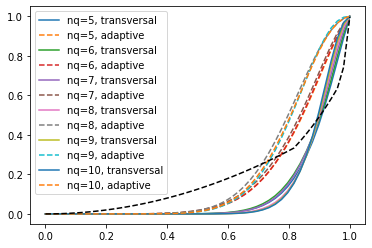

In [8]:

legend = []
for nq in range(nmin, nmax + 1):
    plt.plot(etas, transversal_probs[nq]['fusion'])
    plt.plot(etas, adaptive_probs[nq]['fusion'], '--')
    legend.append(f'{nq=}, transversal')
    legend.append(f'{nq=}, adaptive')
boosted = [max([(1 - 0.5 ** n) * t ** (1/(0.5 ** n)) for n in range(9)]) for t in etas]
# plt.plot(etas, [(1 - pf) * t ** (1/pf) for t in etas], 'k--')
plt.plot(etas, boosted, 'k--')

plt.legend(legend)
plt.show()

In [9]:
save_obj(transversal_perf_dicts, f'transversal_fusion_decoder_dicts_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
save_obj(adaptive_perf_dicts, f'adaptive_fusion_decoder_dicts_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
save_obj(transversal_probs, f'transversal_fusion_decoder_probs_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
save_obj(adaptive_probs, f'adaptive_fusion_decoder_probs_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')




## All data has been generated for subthreshold graphs

In [ ]:

tps = load_obj(f'transversal_fusion_decoder_probs_{nmin}-{9}_subthresh_pfail={pf}', getcwd() + '/data/fusion')

plt.plot(etas, [x  for x in tps[9]['xrec']])
plt.plot(etas, [z for z in tps[9]['zrec']])
plt.plot(etas, [z for z in tps[9]['fusion']])

plt.plot([0, 1], [0.88, 0.88], 'k--')
plt.plot([0.9, 0.9], [0, 1])
plt.show()




## Get Logical fusions plot for paper




In [35]:
nmin = 5
nmax = 10
g_type = 'subthresh'
pf = 0.5
subthresh_adaptive_dicts = load_obj(f'adaptive_fusion_decoder_dicts_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
subthresh_transversal_dicts = load_obj(f'transversal_fusion_decoder_dicts_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')


In [37]:
losses = np.logspace(-3, 0)
m_types = ['fusion', 'xrec', 'zrec']
transversal_probs = {}
adaptive_probs = {}

for nq in range(nmin, nmax + 1):
    transversal_probs[nq] = {m: [] for m in m_types}
    adaptive_probs[nq] = {m: [] for m in m_types}
    for l in losses:
        probs_transversal = prob_from_dict(1-l, pf, decoder_type='TCF', dicts_in=subthresh_transversal_dicts[nq])
        probs_adaptive = prob_from_dict(1-l, pf, decoder_type='ACF', dicts_in=subthresh_adaptive_dicts[nq])

        for m in m_types:
            transversal_probs[nq][m].append(probs_transversal[m])
            adaptive_probs[nq][m].append(probs_adaptive[m])
save_obj(transversal_probs, f'logical_fusion_prob_transversal_logscale_{nmin}-{nmax}_codequbits', getcwd()+'/data/fusion')
save_obj(adaptive_probs, f'logical_fusion_prob_adaptive_logscale_{nmin}-{nmax}_codequbits', getcwd()+'/data/fusion')

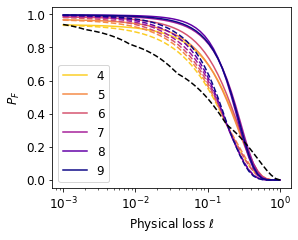

In [38]:
transversal_probs = load_obj(f'logical_fusion_prob_transversal_logscale_{nmin}-{nmax}_codequbits', getcwd()+'/data/fusion')
adaptive_probs = load_obj(f'logical_fusion_prob_adaptive_logscale_{nmin}-{nmax}_codequbits', getcwd()+'/data/fusion')
losses = np.logspace(-3, 0)

# Log scale plot for logical fusion performance
colors = plt.cm.plasma(np.linspace(0.9,0,nmax - nmin + 1))
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(4.3, 3.5))

legend = []
for nq in range(nmin, nmax + 1):
    plt.plot(losses, transversal_probs[nq]['fusion'], '--', color=colors[nq-nmin], label='_nolegend_')
    plt.plot(losses, adaptive_probs[nq]['fusion'], color=colors[nq-nmin])
    legend.append(str(nq-1))
boosted = [max([(1 - 0.5 ** n) * (1-l) ** (1/(0.5 ** n)) for n in range(9)]) for l in losses]
# plt.plot(etas, [(1 - pf) * t ** (1/pf) for t in etas], 'k--')
plt.plot(losses, boosted, 'k--')
plt.xscale('log')
plt.xlabel(r'Physical loss $\ell$', fontsize=12)
plt.ylabel(r'$P_{F}$', rotation=90, fontsize=12)

plt.legend(legend, loc='lower left')
plt.tight_layout()
# plt.savefig('Fusion_prob_5_10_logscale_small', dpi=200)
plt.show()


Import the 11 qubit data for the adaptive decoder

In [3]:
dict_11q  = load_obj('adaptive_fusion_decoder_dicts_11q_subthresh', getcwd() + '/data/fusion')
dat_11q = [prob_from_dict(dicts_in=dict_11q, eta=1-l, pfail=0.5, decoder_type='ACF')['fusion'] for l in np.linspace(0, 1)]




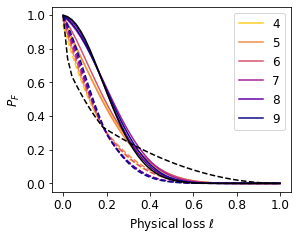

In [22]:
# Linear scale plot for logical fusion performance
nmin = 5
nmax = 10
g_type='subthresh'
pf=0.5
trans_data = load_obj(f'transversal_fusion_decoder_probs_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
adap_data = load_obj(f'adaptive_fusion_decoder_probs_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
losses = np.linspace(0, 1)

colors = plt.cm.plasma(np.linspace(0.9,0,nmax - nmin + 1))
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(4.3, 3.5))

legend = []
for nq in range(nmin, nmax + 1):
    plt.plot(losses, list(reversed(trans_data[nq]['fusion'])), '--', color=colors[nq-nmin], label='_nolegend_')
    plt.plot(losses, list(reversed(adap_data[nq]['fusion'])), color=colors[nq-nmin])
    legend.append(str(nq-1))
boosted = [max([(1 - 0.5 ** n) * (1-l) ** (1/(0.5 ** n)) for n in range(9)]) for l in losses]
# plt.plot(losses, dat_11q, 'k-')
# plt.plot(etas, [(1 - pf) * t ** (1/pf) for t in etas], 'k--')
plt.plot(losses, boosted, 'k--')
# plt.xscale('log')
plt.xlabel(r'Physical loss $\ell$', fontsize=12)
plt.ylabel(r'$P_{F}$', rotation=90, fontsize=12)

plt.legend(legend, loc='upper right')
plt.tight_layout()
plt.savefig('Fusion_prob_5_10_linscale_small', dpi=200)
plt.show()





## Test the RGS graph performance against graphs



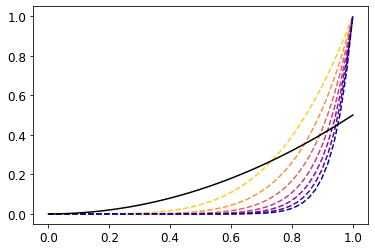

In [13]:
n_arms_min = 2
n_arms_max = 8
# q11_perf = load_obj('')
etas = np.linspace(0, 1)
colors = plt.cm.plasma(np.linspace(0.9,0, n_arms_max - n_arms_min + 1))
for n in range(n_arms_min, n_arms_max+1):
    plt.plot(etas, [rgs_success_probability(n, t, 0.5) for t in etas], color=colors[n-2], ls='--')
    # plt.plot(etas, adap_data[2 * n + 1]['fusion'], color=colors[n-2])
plt.plot(etas, 0.5 * etas ** 2, 'k-')
boosted = [max([(1 - 0.5 ** n) * t ** (1/(0.5 ** n)) for n in range(9)]) for t in etas]
# plt.plot(etas, boosted, '--')

plt.show()



## Get RGS vs graph codes plot for paper



In [32]:
# Getting the data


n_arms_min = 2
n_arms_max = 5

nmin = 5
nmax = 10
g_type = 'subthresh'
pf = 0.5
trans_data = load_obj(f'transversal_fusion_decoder_probs_{nmin}-{nmax}_{g_type}_pfail={pf}',
                      getcwd() + '/data/fusion')
adap_dicts = load_obj(f'adaptive_fusion_decoder_dicts_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
adap_dicts[11] = load_obj('adaptive_fusion_decoder_dicts_11q_subthresh', getcwd() + '/data/fusion')

losses = np.linspace(0, 0.5)
graphs_prob_per_link = {}
rgs_prob_per_link = {}

for n in range(n_arms_min, n_arms_max + 1):
    graphs_prob_per_link[2*n] = (losses, [prob_from_dict((1-l), pf, dicts_in=adap_dicts[2*n + 1])['fusion'] for l in losses])
    rgs_prob_per_link[2 * n] = (losses, [rgs_success_probability(n, (1-l), 0.5) for l in losses])

save_obj(graphs_prob_per_link, 'rgs_graph_fusion_prob_per_link_n=4_6_8_10codequbits', getcwd() + '/data/fusion')
save_obj(rgs_prob_per_link, 'rgs_tree_fusion_prob_per_link_n=4_6_8_10codequbits', getcwd() + '/data/fusion')

In [3]:
# Getting the data -LOGSPACE


n_arms_min = 2
n_arms_max = 5

nmin = 5
nmax = 10
g_type = 'subthresh'
pf = 0.5
trans_data = load_obj(f'transversal_fusion_decoder_probs_{nmin}-{nmax}_{g_type}_pfail={pf}',
                      getcwd() + '/data/fusion')
adap_dicts = load_obj(f'adaptive_fusion_decoder_dicts_{nmin}-{nmax}_{g_type}_pfail={pf}', getcwd() + '/data/fusion')
adap_dicts[11] = load_obj('adaptive_fusion_decoder_dicts_11q_subthresh', getcwd() + '/data/fusion')

losses = np.logspace(-3, 0)
graphs_prob_per_link = {}
rgs_prob_per_link = {}

for n in range(n_arms_min, n_arms_max + 1):
    graphs_prob_per_link[2*n] = (losses, [prob_from_dict((1-l), pf, dicts_in=adap_dicts[2*n + 1])['fusion'] for l in losses])
    rgs_prob_per_link[2 * n] = (losses, [rgs_success_probability(n, (1-l), 0.5) for l in losses])

save_obj(graphs_prob_per_link, 'rgs_graph_fusion_prob_per_link_n=4_6_8_10codequbits_logspace', getcwd() + '/data/fusion')
save_obj(rgs_prob_per_link, 'rgs_tree_fusion_prob_per_link_n=4_6_8_10codequbits_logspace', getcwd() + '/data/fusion')


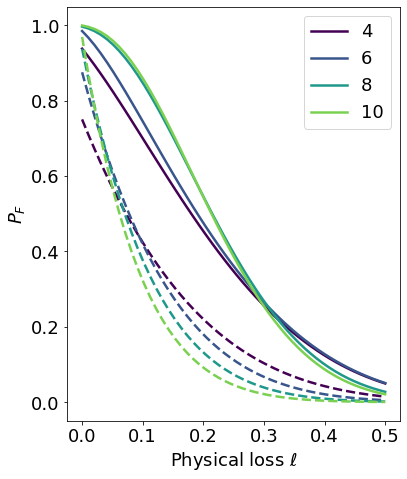

In [34]:
# Now do the plot
graphs_prob_per_link = load_obj('rgs_graph_fusion_prob_per_link_n=4_6_8_10codequbits', getcwd() + '/data/fusion')
rgs_prob_per_link = load_obj('rgs_tree_fusion_prob_per_link_n=4_6_8_10codequbits', getcwd() + '/data/fusion')


colors = plt.cm.viridis(np.linspace(0, 0.8, n_arms_max - n_arms_min + 1))
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(6, 7))
legend = []

for n in range(2, 6):
    legend.append(str(2 * n))
    plt.plot(rgs_prob_per_link[2 * n][0], rgs_prob_per_link[2 * n][1], color=colors[n - 2], ls='--', linewidth=2.5, label='_nolegend_')
    plt.plot(graphs_prob_per_link[2 * n][0], graphs_prob_per_link[2 * n][1], color=colors[n - 2], linewidth=2.5)

plt.legend(legend)
plt.xlabel(r'Physical loss $\ell$')
plt.ylabel(r'$P_{F}$')
plt.tight_layout()

# plt.savefig('vsRGS_prob_5_11_linscale_small', dpi=200)

plt.show()




## Generate data for the FBQC section using logical fusion measurements

C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)
C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)
C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)
C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in do

NameError: name 'dict_11q' is not defined

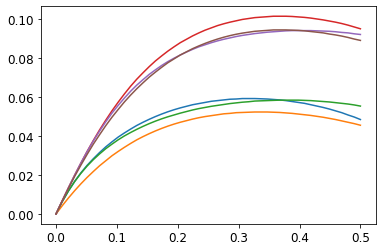

In [6]:
pfs = np.linspace(0, 0.5)
legend = []

for nq in range(nmin, nmax+1):
    # if 5 < nq < 10:
    #     g = best_graphs_func(nq)
    #     nu_dict = get_fusion_peformance(g, decoder_type='ACF')
    #     plt.plot(pfs, [1-fusion_threshold_from_dict(nu_dict, pf, take_min=True) for pf in pfs], '--')
    #     legend.append(str(nq) + ' old')

    plt.plot(pfs, [1-fusion_threshold_from_dict(subthresh_adaptive_dicts[nq], pf, take_min=False) for pf in pfs])
    legend.append(str(nq))
plt.plot(pfs, [1-fusion_threshold_from_dict(dict_11q, pf, take_min=True) for pf in pfs])
legend.append(11)
plt.legend(legend)
plt.show()


In [22]:
def best_g_in_batch(batch):
    max_thresh = 0
    best_graph = None
    for g in batch:
        thresh = 1 - fusion_threshold_from_dict(g[1], 0.5, take_min=False)

        # print(thresh, 1-g[2])
        if thresh > max_thresh or best_graph is None:
            max_thresh = thresh
            best_graph = g
    # print(max_thresh)
    return best_graph

best_graphs_fbqc = {}
for nq in range(4, 9):
    x = load_obj(f'{nq}_qubit_performance', getcwd() + '/data/fusion')
    best_graphs_fbqc[nq] = best_g_in_batch(x)

x9s = load_obj('graph_performance_fusion_batch0', getcwd() + '/graphs_batched_9q')
best_graphs_fbqc[9] = best_g_in_batch(x9s)
best_thr = 0
current_best = None
for bn in range(26):
    x10s = load_obj(f'graph_performance_fusion_batch{bn}', getcwd() + '/graphs_batched_10q')
    nu_best = best_g_in_batch(x10s)
    if 1 - nu_best[2] > best_thr:
        current_best = nu_best
        best_thr = 1 - nu_best[2]
best_graphs_fbqc[10] = current_best
print([1-a[2] for a in best_graphs_fbqc.values()])
# draw_graph(best_graphs_fbqc[10][0], from_edges=True)


[0, 0.043408203125000044, 0.045361328125000044, 0.06333007812499991, 0.07534179687499987, 0.08881835937500004, 0.09604492187500013]


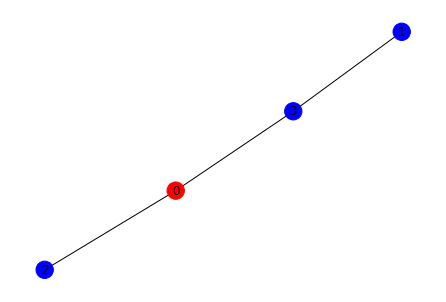

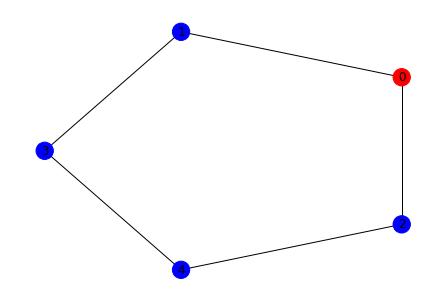

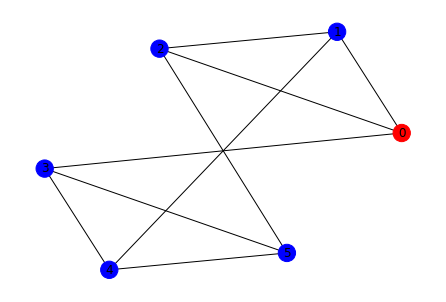

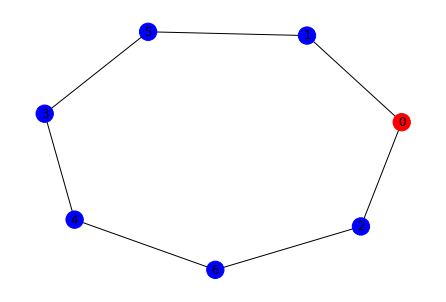

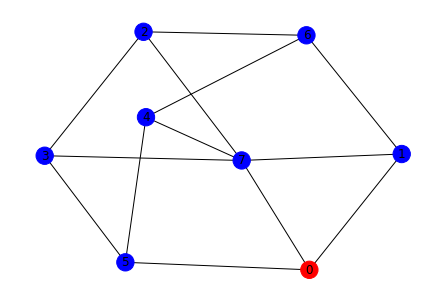

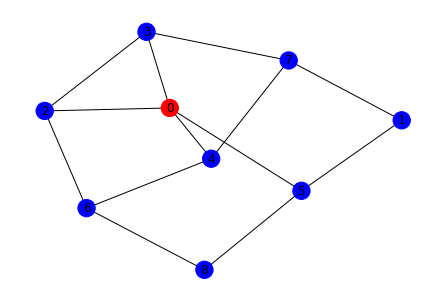

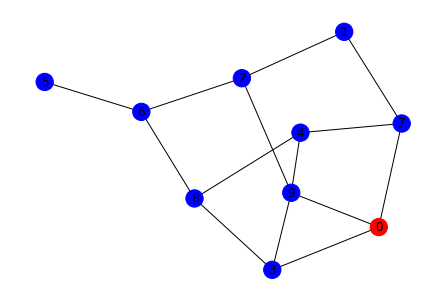

In [25]:
for nq in range(4, 11):
    draw_graph(best_graphs_fbqc[nq][0], from_edges=True)

### Make a nice-looking figure



C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)
C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)
C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)
C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1131: RuntimeWarning: divide by zero encountered in do

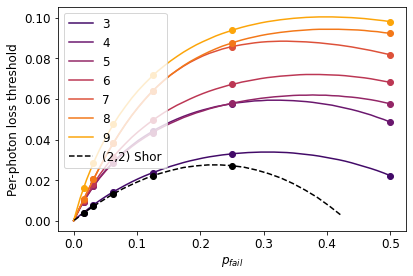

In [12]:
pfs = np.linspace(0, 0.5)
pf_discr = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]
legend = []
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 11-4))
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5.9, 4))

for nq in range(4, 11):
    # if 5 < nq < 10:
    #     g = best_graphs_func(nq)
    #     nu_dict = get_fusion_peformance(g, decoder_type='ACF')
    #     plt.plot(pfs, [1-fusion_threshold_from_dict(nu_dict, pf, take_min=True) for pf in pfs], '--')
    #     legend.append(str(nq) + ' old')

    plt.plot(pfs, [1-fusion_threshold_from_dict(best_graphs_fbqc[nq][1], pf, take_min=False) for pf in pfs], color=colors[nq-4])
    plt.plot(pf_discr, [1-fusion_threshold_from_dict(best_graphs_fbqc[nq][1], pf, take_min=False) for pf in pf_discr], color=colors[nq-4], marker='o', ls='', linewidth=2, label='_nolegend_')

    legend.append(str(nq-1))
shor_dec = AnalyticShor22()
shor_dec.plot_threshold(show=False, w=0.5)
legend.append('(2,2) Shor')


xnew = np.linspace(pf_discr[-1], 0.5)
for n in range(5, 11):
    x = pf_discr
    y = thresh_data[n]
    f2 = interp1d(x, y, kind='cubic')
    plt.plot(xnew, f2(xnew), color=colors[n-4], ls='--', linewidth=2, label='_nolegend_')
    plt.plot(x, y, marker='o',  color=colors[n-4], ls='', label='_nolegend_')




# legend.append(11)
plt.legend(legend, loc='upper left')
plt.xlabel(r'$p_{fail}$')
plt.ylabel('Per-photon loss threshold')
plt.tight_layout()

# plt.savefig('FBQC_threshold_plot', dpi=200)
plt.show()

In [7]:
print(1-fusion_threshold_from_dict(best_graphs_fbqc[10][1], 0.5, take_min=False))


0.09802734374999988


In [42]:
from graph_finding import graph_perf_fusion
print(graph_perf_fusion((0, best_graphs_fbqc[4][0])))


(EdgeView([(0, 2), (1, 3), (2, 3)]), {'fusion': {((2,), (), (), (), ()): [{'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 0, 'fusion': 1, 'ffx': 0, 'ffy': 0, 'ffz': 0, 'floss': 0}, {'x': 1, 'xf': 0, 'y': 0, 'yf': 0, 'z': 0, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffy': 0, 'ffz': 0, 'floss': 0}], ((1,), (), (2,), (), ()): [{'x': 0, 'xf': 0, 'y': 1, 'yf': 0, 'z': 0, 'zf': 0, 'fusion': 1, 'ffx': 0, 'ffy': 1, 'ffz': 0, 'floss': 0}], ((3,), (), (2,), (1,), ()): [{'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 0, 'zf': 0, 'fusion': 1, 'ffx': 0, 'ffy': 1, 'ffz': 1, 'floss': 0}]}, 'xrec': {((2,), (), (), (), ()): [{'x': 0, 'xf': 1, 'y': 0, 'yf': 0, 'z': 0, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffy': 0, 'ffz': 0, 'floss': 0}], ((), (), (), (), (2,)): [{'x': 1, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 0, 'fusion': 0, 'ffx': 0, 'ffy': 0, 'ffz': 0, 'floss': 1}]}, 'zrec': {((), (), (2, 3), (1,), ()): [{'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 0, 'zf': 0, 'fusion': 0, 'ffx': 0, 'ffy': 2, 'ffz': 1, 'floss': 0}]}}, 1)


## Do the FBQC thresholds for the transversal decoder



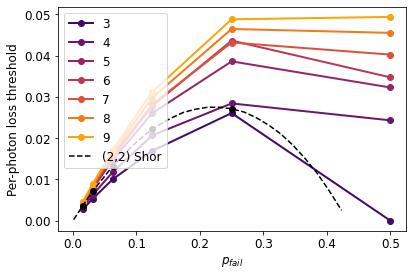

In [14]:

pfs = np.linspace(0.01, 0.5, 20)
pf_discr = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]
legend = []
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 11-4))
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5.9, 4))
thresh_data = {}

for nq in range(4, 11):
    # if 5 < nq < 10:
    #     g = best_graphs_func(nq)
    #     nu_dict = get_fusion_peformance(g, decoder_type='ACF')
    #     plt.plot(pfs, [1-fusion_threshold_from_dict(nu_dict, pf, take_min=True) for pf in pfs], '--')
    #     legend.append(str(nq) + ' old')
    perf_dict = get_fusion_peformance(graph_from_edges(best_graphs_fbqc[nq][0]), decoder_type='TCF')
    thresh_data[nq] = [1-fusion_threshold_from_dict(perf_dict, pf, take_min=False, decoder_type='TCF') for pf in pf_discr]

    # plt.plot(pfs, [1-fusion_threshold_from_dict(perf_dict, pf, take_min=False, decoder_type='TCF') for pf in pfs], color=colors[nq-4])
    plt.plot(pf_discr, thresh_data[nq], color=colors[nq-4], marker='o', ls='-', linewidth=2)

    legend.append(str(nq-1))
shor_dec = AnalyticShor22()
shor_dec.plot_threshold(show=False, w=0.5)
legend.append('(2,2) Shor')
# legend.append(11)
plt.legend(legend, loc='upper left')
plt.xlabel(r'$p_{fail}$')
plt.ylabel('Per-photon loss threshold')
plt.tight_layout()

# plt.savefig('FBQC_threshold_plot_transversal', dpi=200)
plt.show()

In [3]:
save_obj(thresh_data, 'Transversal_fbqc_thresholds', getcwd()+'/data/fusion')


NameError: name 'thresh_data' is not defined

## make a nice figure including the transversal data




NameError: name 'pf_discr' is not defined

In [6]:
thresh_data = load_obj('Transversal_fbqc_thresholds', getcwd()+'/data/fusion')


In [7]:
logical_fusions_lines = {}
logical_fusion_points = {}
pfs = np.linspace(0, 0.5)
pf_discr = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]

for nq in range(4, 11):
    # if 5 < nq < 10:
    #     g = best_graphs_func(nq)
    #     nu_dict = get_fusion_peformance(g, decoder_type='ACF')
    #     plt.plot(pfs, [1-fusion_threshold_from_dict(nu_dict, pf, take_min=True) for pf in pfs], '--')
    #     legend.append(str(nq) + ' old')
    logical_fusions_lines[nq] = {'adaptive': [], 'transversal': []}
    logical_fusion_points[nq] = {'adaptive': [], 'transversal': []}
    logical_fusions_lines[nq]['adaptive'] = (pfs, [1-fusion_threshold_from_dict(best_graphs_fbqc[nq][1], pf, take_min=False) for pf in pfs])
    logical_fusion_points[nq]['adaptive'] = (pf_discr, [1-fusion_threshold_from_dict(best_graphs_fbqc[nq][1], pf, take_min=False) for pf in pf_discr])

shor_dec = AnalyticShor22()
shor_data = (pfs, [1-shor_dec.get_threshold(pf, no_w=True) for pf in pfs])
# print(shor_data)
newx, newy = [], []
for i in range(len(shor_data[0])):
    if shor_data[1][i] > 0:
        newx.append(shor_data[0][i])
        newy.append(shor_data[1][i])
logical_fusions_lines['(2,2) Shor'] = (newx, newy)

xnew = np.linspace(pf_discr[-1], 0.5)
for n in range(5, 11):
    x = pf_discr
    y = thresh_data[n]
    f2 = interp1d(x, y, kind='cubic')
    logical_fusion_points[n]['transversal'] = (x, y)
    logical_fusions_lines[n]['transversal'] = (xnew, f2(xnew))
    # plt.plot(xnew, f2(xnew), color=colors[n-4], ls='--', linewidth=2, label='_nolegend_')
    # plt.plot(x, y, marker='o',  color=colors[n-4], ls='', label='_nolegend_')

# save_obj(logical_fusions_lines, 'fbqcThresholdLines_3-10codequbits', getcwd() + '/data/fusion')
# save_obj(logical_fusion_points, 'fbqcThresholdPoints_3-10codequbits', getcwd() + '/data/fusion')


C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1113: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)
C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  p0 = 1 - (1 - 0.5 * pfail) * eta ** (1/pfail)


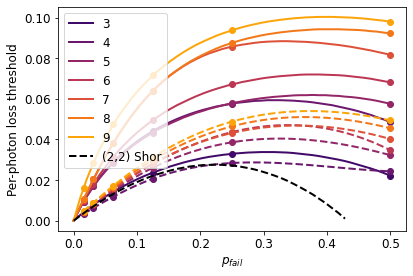

In [8]:
logical_fusions_lines = load_obj('fbqcThresholdLines_3-10codequbits', getcwd() + '/data/fusion')
logical_fusion_points = load_obj('fbqcThresholdPoints_3-10codequbits', getcwd() + '/data/fusion')


legend = []
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 11-4))
lstype = {'adaptive': '-', 'transversal': '--'}
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5.9, 4))
for nq in range(4, 11):
    for dec_type in ('transversal', 'adaptive'):
        if nq > 4 or dec_type == 'adaptive':
            if dec_type == 'transversal':
                plt.plot(logical_fusions_lines[nq][dec_type][0], logical_fusions_lines[nq][dec_type][1], color=colors[nq-4], linewidth=2, ls=lstype[dec_type], label='_nolegend_')
            else:
                plt.plot(logical_fusions_lines[nq][dec_type][0], logical_fusions_lines[nq][dec_type][1], color=colors[nq-4], linewidth=2, ls=lstype[dec_type])
            plt.plot(logical_fusion_points[nq][dec_type][0], logical_fusion_points[nq][dec_type][1], color=colors[nq-4], marker='o', ls='', linewidth=2, label='_nolegend_')
    legend.append(str(nq-1))
plt.plot(logical_fusions_lines['(2,2) Shor'][0], logical_fusions_lines['(2,2) Shor'][1], 'k--', linewidth=2)
legend.append('(2,2) Shor')

# legend.append(11)
plt.legend(legend, loc='upper left')
plt.xlabel(r'$p_{fail}$')
plt.ylabel('Per-photon loss threshold')
plt.tight_layout()

# plt.savefig('FBQC_threshold_plot_include_transversal', dpi=200)
plt.show()



In [9]:
print(logical_fusion_points[10]['adaptive'][1])


[0.09802734374999988, 0.09380859374999995, 0.07154296874999999, 0.047402343749999964, 0.028535156250000027, 0.01611328125]


## Get performance of the 12 qubit graph




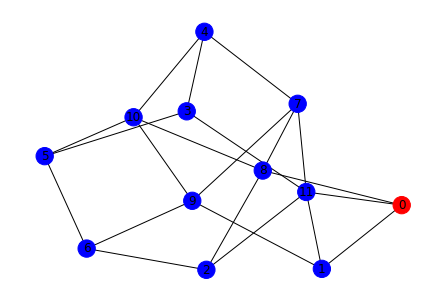

In [13]:
g_12 = load_obj('best_12_qubit_graphs', getcwd()+'/best_graphs')[12][0][0]
draw_graph(g_12, from_edges=True)

In [16]:
fusion_dicts = get_fusion_peformance(graph_from_edges(g_12), decoder_type='ACF')
thresh = fusion_threshold_from_dict(fusion_dicts, 0.5, take_min=True)
thresh_cheat = fusion_threshold_from_dict(fusion_dicts, 0.5, take_min=False)
print(thresh, thresh_cheat)


0.9054199218750001 0.901806640625


In [17]:
save_obj(fusion_dicts, 'adaptive_decoder_dicts_12q_subthresh', getcwd()+'/data/fusion')


In [4]:
from helpers import load_obj
from os import getcwd
r7 = load_obj('8_qubit_performance', getcwd() + '/data/fusion')
t7s = [1-r[2] for r in r7]
print(max(t7s))


0.07954101562499982


In [22]:
maxmax = 0
for batchno in range(26):

    r10s = load_obj(f'graph_performance_fusion_batch{batchno}', getcwd() + '/graphs_batched_10q')
    thr9s = [1-r[2] for r in r10s]
    maxthr = max(thr9s)
    if maxthr > maxmax:
        maxmax = maxthr
print(maxmax)




1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
133
0.09604492187500013


## Load a random 11 qubit graph and see how long it takes.


In [26]:
from random import randint
from time import time
for _ in range(10):
    batchno = randint(0, 81)
    gno = randint(0, 5000)
    print(batchno)
    x = load_obj(f'graph_data_batch{batchno}', getcwd() + '/graphs_batched_11q')
    g = x[gno][1]
    t0 = time()
    get_fusion_peformance(graph_from_edges(g))
    t1 = time()
    print(t1-t0)

1


KeyboardInterrupt: 

## Analyse the 11 qubit graphs analysed for logical fusion




In [4]:
def best_g_in_batch(batch):
    max_thresh = 0
    best_graph = None
    for g in batch:
        thresh = 1 - fusion_threshold_from_dict(g[1], 0.5, take_min=False)

        if thresh > max_thresh or best_graph is None:
            max_thresh = thresh
            best_graph = g
    return best_graph, max_thresh

nfilemax = 405
current_max_thresh = 0
current_best_graph = None
for fnum in range(nfilemax+1):
    try:
        dat = load_obj(f'graph_performance_fusion_batch{fnum}', getcwd() + '/graphs_batched_11q_fusion')
        new_g, new_thr = best_g_in_batch(dat)
        if new_thr > current_max_thresh:
            current_best_graph = new_g
            current_max_thresh = new_thr
    except FileNotFoundError:
        pass
    print(current_max_thresh)
save_obj(current_best_graph, 'best_11q_fusion_graph_adaptive', os.getcwd() + '/data/fusion')


0.09896484374999992
0.10224609375000004
0.10224609375000004
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10318359375000008
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987
0.10341796874999987


EOFError: Ran out of input

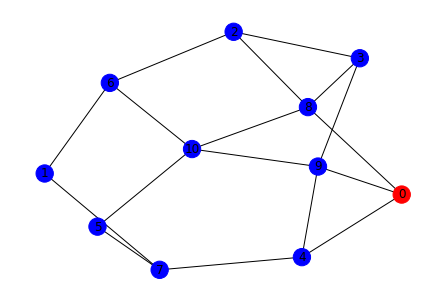

In [5]:
draw_graph(current_best_graph[0], from_edges=True)

In [6]:
print(current_best_graph[2])

0.902392578125


In [9]:
1 - fusion_threshold_from_dict(current_best_graph[1], 0.5, take_min=False)

0.10529296874999994

In [12]:
pfs = np.linspace(0, 0.5)
pf_discr = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]

adaptive_fusion_line_11q = (pfs, [1 - fusion_threshold_from_dict(current_best_graph[1], pf, take_min=False) for pf in pfs])
adaptive_fusion_points_11q = (pf_discr, [1 - fusion_threshold_from_dict(current_best_graph[1], pf, take_min=False) for pf in pf_discr])

C:\Users\ip19160\PycharmProjects\LTdecode\logical_fusions.py:1113: RuntimeWarning: divide by zero encountered in double_scalars
  prob_f = ((eta ** (1/pfail)) * (1-pfail)) ** len(fusions) * ((eta ** (1/pfail)) * pfail) ** (len(ffx) + len(ffy) + len(ffz)) * (1 - eta ** (1/pfail)) ** len(losses)


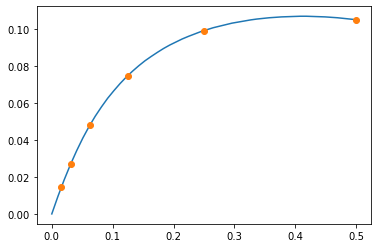

In [13]:
plt.plot(adaptive_fusion_line_11q[0], adaptive_fusion_line_11q[1])
plt.plot(adaptive_fusion_points_11q[0], adaptive_fusion_points_11q[1], 'o')
plt.show()


In [14]:
save_obj(adaptive_fusion_line_11q, 'fbqcThresholdLine10_codequbitsAdaptive', getcwd() + '/data/fusion')
save_obj(adaptive_fusion_points_11q, 'fbqcThresholdPoints10_codequbitsAdaptive', getcwd() + '/data/fusion')



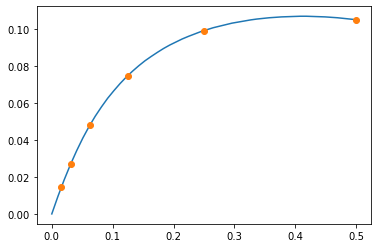

In [15]:
lines = load_obj('fbqcThresholdLine10_codequbitsAdaptive', getcwd() + '/data/fusion')
points = load_obj('fbqcThresholdPoints10_codequbitsAdaptive', getcwd() + '/data/fusion')
plt.plot(lines[0], lines[1])
plt.plot(points[0], points[1], 'o')
plt.show()
